<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data_add_delta_(_1_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-1.6'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.6_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.364214,74.814884,26.039950,49.785951,0.006955,216.011954,216.009947,0.002007
1,0.0,1.0,57.092100,50.631689,20.964717,64.739903,-0.006144,203.422265,203.434374,-0.012109
2,0.0,2.0,85.822749,89.934028,87.131112,96.934220,0.003987,369.826097,369.818966,0.007131
3,0.0,3.0,95.961296,54.597571,58.984457,59.942272,-0.008683,279.476913,279.490009,-0.013096
4,0.0,4.0,34.600133,39.395267,23.367708,55.324622,0.034430,162.722160,162.689070,0.033090
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.603410,48.702408,97.858088,92.817402,-0.005733,277.975574,277.988000,-0.012425
249996,999.0,246.0,38.042105,87.196917,88.091113,95.997163,-0.055075,319.272223,319.325579,-0.053356
249997,999.0,247.0,75.749868,72.229426,64.992909,73.009228,-0.043905,295.937527,295.981184,-0.043656
249998,999.0,248.0,82.605072,66.615187,48.789778,42.873722,0.014009,250.897768,250.886879,0.010889


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,55.364214,74.814884,26.039950,49.785951,0.006955,216.011954,216.009947,0.002007
1,0.0,1.0,57.092100,50.631689,20.964717,64.739903,-0.006144,203.422265,203.434374,-0.012109
2,0.0,2.0,85.822749,89.934028,87.131112,96.934220,0.003987,369.826097,369.818966,0.007131
3,0.0,3.0,95.961296,54.597571,58.984457,59.942272,-0.008683,279.476913,279.490009,-0.013096
4,0.0,4.0,34.600133,39.395267,23.367708,55.324622,0.034430,162.722160,162.689070,0.033090
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,28.603410,48.702408,97.858088,92.817402,-0.005733,277.975574,277.988000,-0.012425
249996,999.0,246.0,38.042105,87.196917,88.091113,95.997163,-0.055075,319.272223,319.325579,-0.053356
249997,999.0,247.0,75.749868,72.229426,64.992909,73.009228,-0.043905,295.937527,295.981184,-0.043656
249998,999.0,248.0,82.605072,66.615187,48.789778,42.873722,0.014009,250.897768,250.886879,0.010889


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    55.364214  74.814884  26.039950  49.785951  0.006955  216.011954   
      1.0    57.092100  50.631689  20.964717  64.739903 -0.006144  203.422265   
      2.0    85.822749  89.934028  87.131112  96.934220  0.003987  369.826097   
      3.0    95.961296  54.597571  58.984457  59.942272 -0.008683  279.476913   
      4.0    34.600133  39.395267  23.367708  55.324622  0.034430  162.722160   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  28.603410  48.702408  97.858088  92.817402 -0.005733  277.975574   
      246.0  38.042105  87.196917  88.091113  95.997163 -0.055075  319.272223   
      247.0  75.749868  72.229426  64.992909  73.009228 -0.043905  295.937527   
      248.0  82.605072  66.615187  48.789778  42.873722  0.014009  250.897768   
      249.0  91.362168  85.709864  53.149374  38.549747 -0.020343  278.750810   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    216.009947  0.002007  
      1.0    203.434374 -0.012109  
      2.0    369.818966  0.007131  
      3.0    279.490009 -0.013096  
      4.0    162.689070  0.033090  
...                 ...       ...  
999.0 245.0  277.988000 -0.012425  
      246.0  319.325579 -0.053356  
      247.0  295.981184 -0.043656  
      248.0  250.886879  0.010889  
      249.0  278.770617 -0.019807  

[250000 rows x 8 columns]

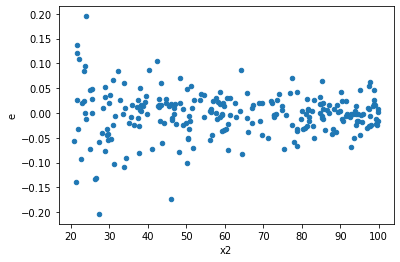

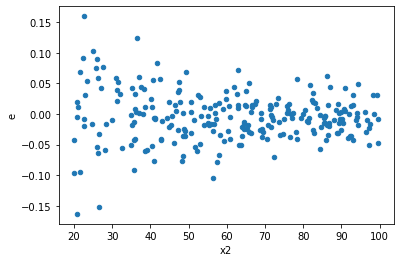

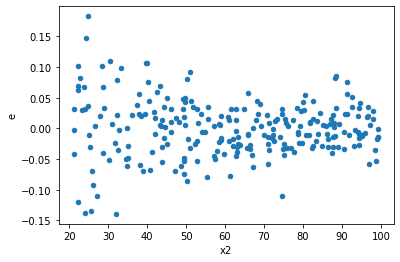

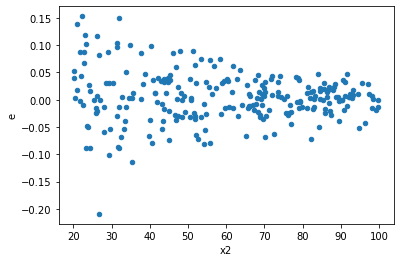

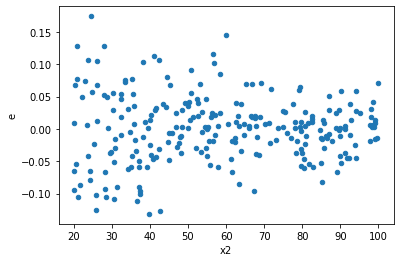

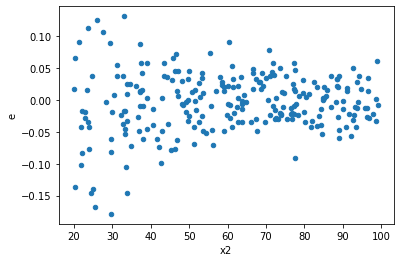

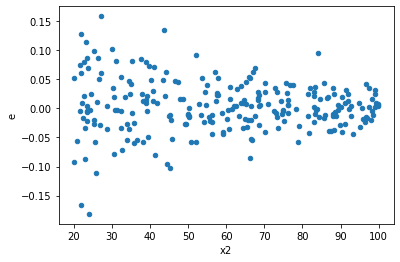

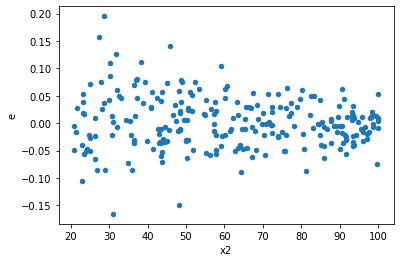

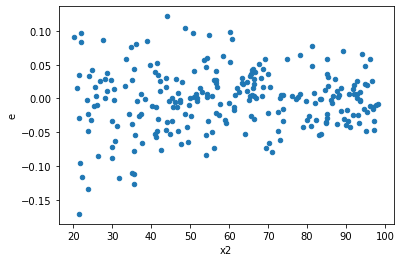

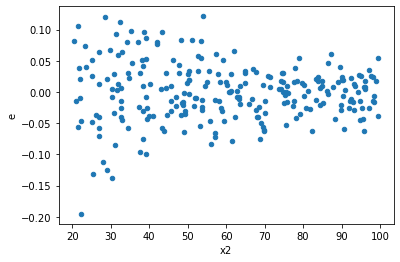

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3", "x4"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,109.0,133.0,0.09572264428400969,0.42837033833070565,0.0008781893971010063,0.003220829611509065,3.667579706770949,2.3001600624183993e-12,0.9999999999988499,1.1500800312091997e-12,Reject005=0 : Heteroscedasticity
2.0,122.0,120.0,0.13953934446133406,0.36614862888231814,0.001143765118535525,0.0030512385740193177,2.6677143100203287,1.3215989835835273e-07,0.9999999339200508,6.607994917917637e-08,Reject005=0 : Heteroscedasticity
3.0,124.0,118.0,0.21338607648235008,0.30531997983954406,0.0017208554555028233,0.0025874574562673226,1.503587909137484,0.02608141818154186,0.9869592909092291,0.01304070909077093,Reject005=0 : Heteroscedasticity
4.0,119.0,123.0,0.2899919908632806,0.35970411042678535,0.0024369074862460554,0.002924423662006385,1.2000552661567492,0.3165230111602413,0.8417384944198794,0.15826150558012064,Reject005=1 : Homoscedasticity
5.0,117.0,125.0,0.21139167175240012,0.3192986013756491,0.001806766425234189,0.0025543888110051926,1.4137902804310183,0.05737550540014813,0.9713122472999259,0.028687752700074065,Reject005=1 : Homoscedasticity
7.0,113.0,129.0,0.1413803066361693,0.3929896478438392,0.0012511531560722947,0.0030464313786344125,2.4348988481937557,1.2562832760742992e-06,0.999999371858362,6.281416380371496e-07,Reject005=0 : Heteroscedasticity
8.0,126.0,116.0,0.24755094679380757,0.24029922286568958,0.0019646900539191077,0.0020715450247042206,1.0543876987476786,0.7735006129633506,0.6132496935183247,0.3867503064816753,Reject005=1 : Homoscedasticity
9.0,131.0,111.0,0.20546914063765287,0.3196197511664416,0.001568466722424831,0.00287945721771569,1.8358420848509192,0.0010895758806781508,0.9994552120596609,0.0005447879403390754,Reject005=0 : Heteroscedasticity
11.0,120.0,122.0,0.2227631597526212,0.3249065426297826,0.0018563596646051768,0.0026631683822113325,1.434618750336699,0.04804931509847177,0.9759753424507641,0.024024657549235884,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,109.0,133.0,0.09572264428400969,0.42837033833070565,0.0008781893971010063,0.003220829611509065,3.667579706770949,2.3001600624183993e-12,Reject005=0 : Heteroscedasticity
1.0,125.0,117.0,0.2248564261820974,0.17730243154081135,0.0017988514094567792,0.0015154053977847123,0.8424294468225908,0.3457228051080552,Reject005=1 : Homoscedasticity
2.0,122.0,120.0,0.13953934446133406,0.36614862888231814,0.001143765118535525,0.0030512385740193177,2.6677143100203287,1.3215989835835273e-07,Reject005=0 : Heteroscedasticity
3.0,124.0,118.0,0.21338607648235008,0.30531997983954406,0.0017208554555028233,0.0025874574562673226,1.503587909137484,0.02608141818154186,Reject005=0 : Heteroscedasticity
4.0,119.0,123.0,0.2899919908632806,0.35970411042678535,0.0024369074862460554,0.002924423662006385,1.2000552661567492,0.3165230111602413,Reject005=1 : Homoscedasticity
5.0,117.0,125.0,0.21139167175240012,0.3192986013756491,0.001806766425234189,0.0025543888110051926,1.4137902804310183,0.05737550540014813,Reject005=1 : Homoscedasticity
6.0,108.0,134.0,0.3292589342399721,0.1631460264294468,0.003048693835555297,0.0012175076599212449,0.3993538628648438,1.2766433289750739e-06,Reject005=0 : Heteroscedasticity
7.0,113.0,129.0,0.1413803066361693,0.3929896478438392,0.0012511531560722947,0.0030464313786344125,2.4348988481937557,1.2562832760742992e-06,Reject005=0 : Heteroscedasticity
8.0,126.0,116.0,0.24755094679380757,0.24029922286568958,0.0019646900539191077,0.0020715450247042206,1.0543876987476786,0.7735006129633506,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      528
Reject005=0 : Heteroscedasticity    472
Name: Result_test, dtype: int64